# All Imports

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re

# Height Classifier

In [47]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/Cropland_Masked/Train/2018/Height_Balanced.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/Cropland_Masked/Test/2019/raichur_merged_test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 

# Define target variable
target_column = "height_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_height = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_height.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_height.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_common.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_11560\2497434051.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11560\2497434051.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.7377

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.61      0.57      2039
           2       0.84      0.80      0.82      5833
           3       0.05      0.05      0.05       176

    accuracy                           0.74      8048
   macro avg       0.48      0.49      0.48      8048
weighted avg       0.75      0.74      0.74      8048


🔹 Confusion Matrix:
 [[1238  734   67]
 [1067 4691   75]
 [   9  159    8]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


### Step: Print the Predictions

In [48]:
# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_common.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/height_blr_rural_comparison_15Day.csv", index=False)

# Print the result
print(result)

Predicted_height Crop_Name  Height     1     2   3
0                    Bajra   Short    18   142   4
1                   Castor    Tall     6   101   1
2                   Cotton  Medium   621  3652  63
3                    Jowar  Medium    20    40   0
4                    Maize  Medium    27    41   1
5                  Mangoes    Tall     3    58   7
6                    Paddy   Short  1220   592  63
7                  Redgram  Medium   399   958  11


### Step: Feature Importance


🔹 Top 10 Important Features:
1. VH_7 (0.0414)
2. VH_5 (0.0364)
3. VH_13 (0.0362)
4. VH_6 (0.0347)
5. VH_8 (0.0318)
6. VH_9 (0.0274)
7. VH_14 (0.0228)
8. VV_13 (0.0214)
9. VH_4 (0.0209)
10. VV_6 (0.0201)


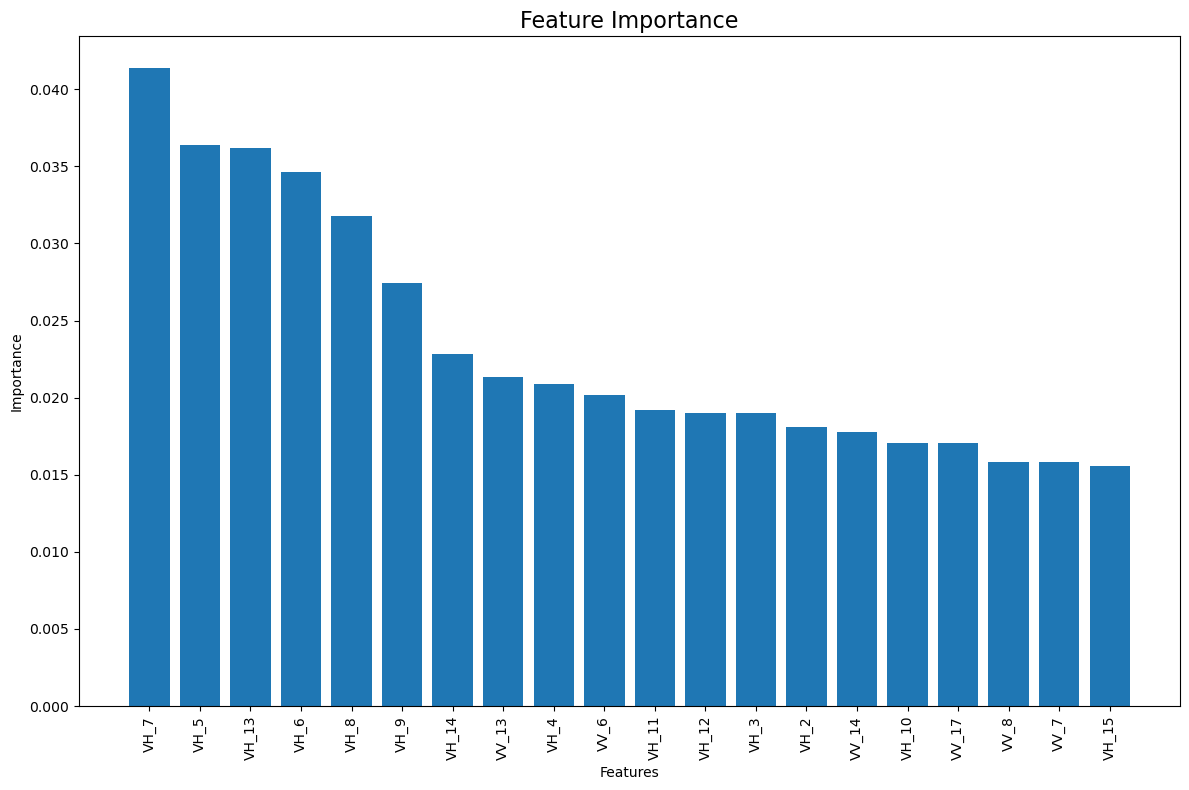

In [49]:

# --- Feature Importance ---
importances = rf_classifier_height.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Duration Classifier

In [50]:
train_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/Cropland_Masked/Train/2018/Duration_Balanced.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/Cropland_Masked/Test/2019/bidar_merged_test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 

# Define target variable
target_column = "duration_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_duration = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_duration.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_duration.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_duration"] = y_pred
test_df["Correct"] = test_df["Predicted_duration"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_duration.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_11560\492588390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11560\492588390.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.3174

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.02      0.04      1110
           2       0.59      0.32      0.42      4361
           3       0.17      0.55      0.26      1294

    accuracy                           0.32      6765
   macro avg       0.34      0.30      0.24      6765
weighted avg       0.46      0.32      0.33      6765


🔹 Confusion Matrix:
 [[  24  404  682]
 [  55 1410 2896]
 [  15  566  713]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


### Print Predictions

In [51]:
# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Duration"])["Predicted_duration"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/duration_blr_rural_comparison.csv", index=False)

# Print the result
print(result)

Predicted_duration  Crop_Name Duration   1    2     3
0                      Cotton     Long   1   16    69
1                      Ginger     Long   3   42    89
2                   Greengram      Low  15  171   259
3                       Jowar      Low   2  146   246
4                       Maize   Medium   0   28    29
5                     Mangoes     Long   0   26    32
6                     Redgram   Medium  30  600  1457
7                    Soyabean   Medium  25  782  1410
8                   Sugarcane     Long  11  482   523
9                        Urad      Low   7   87   177


### Feature Importance


🔹 Top 10 Important Features:
1. VV_17 (0.0274)
2. VV_18 (0.0238)
3. VV_19 (0.0207)
4. VH_8 (0.0187)
5. VH_5 (0.0186)
6. VH_19 (0.0183)
7. VV_16 (0.0179)
8. VH_13 (0.0177)
9. VH_18 (0.0174)
10. VH_6 (0.0173)


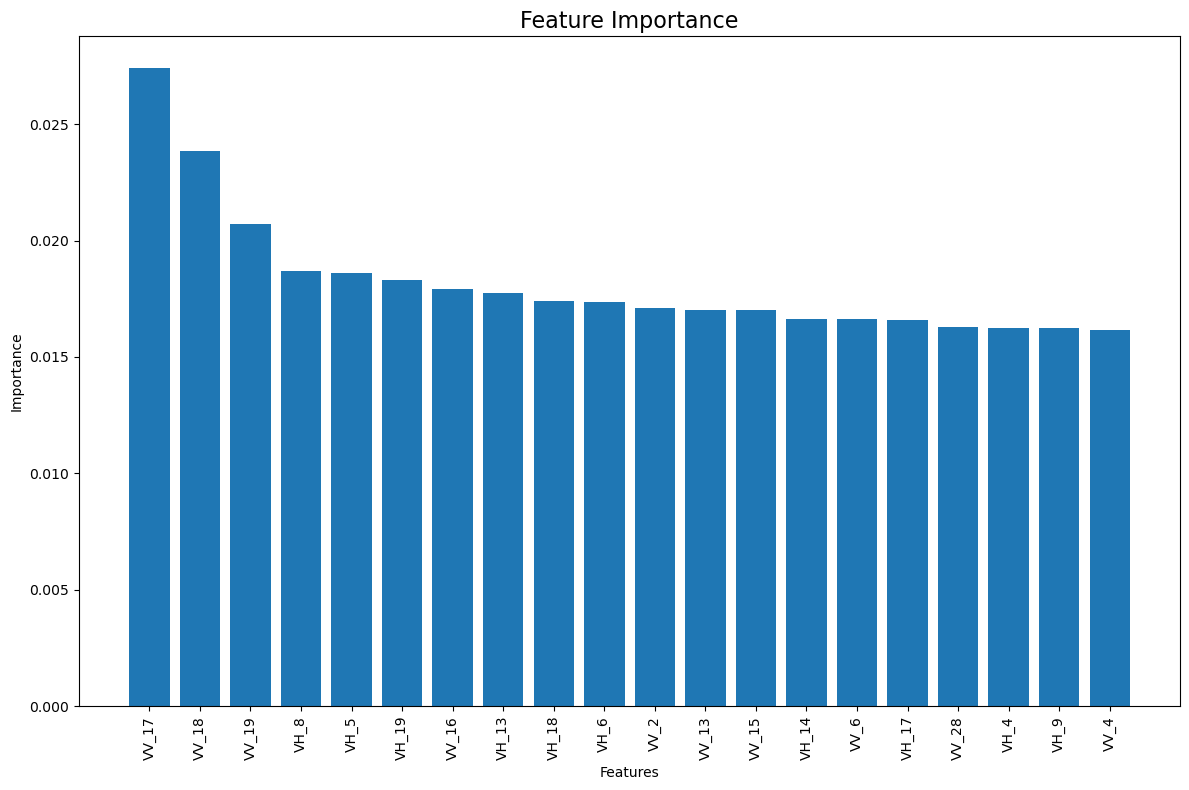

In [52]:

# --- Feature Importance ---
importances = rf_classifier_duration.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Structure Classifier

In [57]:
train_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/Cropland_Masked/Train/2018/Structure_Balanced.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/Cropland_Masked/Test/2019/raichur_merged_test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 


# Define target variable
target_column = "structure_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_structure = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_structure.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_structure.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_Structure"] = y_pred
test_df["Correct"] = test_df["Predicted_Structure"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Karnataka_Datasets/Across/S2/Results.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
#misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_11560\7656158.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11560\7656158.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

🔹 Accuracy: 0.7300

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.04      0.06      0.04        68
           2       0.82      0.81      0.82      5812
           3       0.53      0.52      0.53      2168
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.73      8048
   macro avg       0.28      0.28      0.28      8048
weighted avg       0.74      0.73      0.73      8048


🔹 Confusion Matrix:
 [[   4   41   23    0    0]
 [  59 4736  980    8   29]
 [  49  968 1135    9    7]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


### Print Results

In [58]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Across/S2/Results.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Structure"])["Predicted_Structure"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)

Predicted_Structure Crop_Name Structure   1     2     3  4   6
0                       Bajra     Grass   3   124    36  1   0
1                      Castor     Shrub   0    90    18  0   0
2                      Cotton     Shrub  51  3673   600  1  11
3                       Jowar     Grass   0    37    18  1   4
4                       Maize     Grass   0    52    16  0   1
5                     Mangoes      Tree   4    41    23  0   0
6                       Paddy     Grass  46   755  1065  7   2
7                     Redgram     Shrub   8   973   362  7  18


### Feature Importance


🔹 Top 10 Important Features:
1. VH_6 (0.0383)
2. VH_8 (0.0319)
3. VH_9 (0.0310)
4. VH_19 (0.0296)
5. VH_5 (0.0294)
6. VH_7 (0.0264)
7. VH_18 (0.0264)
8. VV_2 (0.0235)
9. VH_12 (0.0223)
10. VV_4 (0.0213)


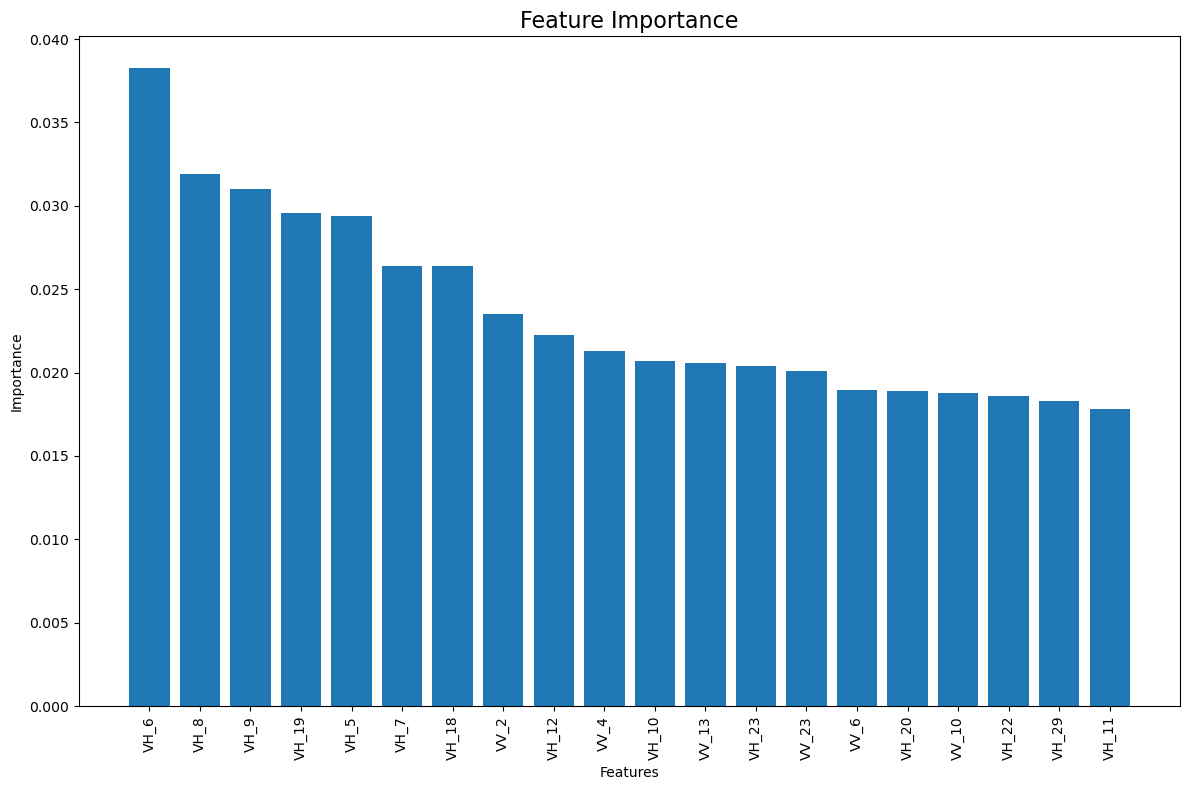

In [10]:

# --- Feature Importance ---
importances = rf_classifier_structure.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Unique Triplet Identification

In [24]:
# Group crops by (height, structure, duration) triplet
triplet_to_crops = train_df.groupby(["height_numeric", "structure_numeric", "duration_numeric"])["Crop_Name"].unique()

# Print nicely
for triplet, crops in triplet_to_crops.items():
    crops_list = ", ".join(crops)
    print(f"Triplet {triplet}: {crops_list}")

Triplet (1, 2, 1): Greengram, Urad
Triplet (1, 3, 2): Paddy
Triplet (2, 2, 2): Redgram
Triplet (2, 2, 3): Cotton
Triplet (2, 3, 1): Jowar
Triplet (2, 3, 2): Maize
Triplet (3, 3, 3): Sugarcane


### Combining the Three Classifiers

In [32]:

# --------------------------------------
# 1. Load Train/Test Data
# --------------------------------------

train_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/2020-21/SAR_GCVI/AEZ_6/Final/Train/Train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Kharif/2020-21/SAR_GCVI/AEZ_6/Final/Test/Bidar_Data_Final.csv")

# Extract only VV_i and VH_i features (first 15 VV and 15 VH)
VV_columns = sorted([col for col in train_df.columns if col.startswith("VV_")])
VH_columns = sorted([col for col in train_df.columns if col.startswith("VH_")])
feature_columns = VV_columns + VH_columns

X_train = train_df[feature_columns]
X_test = test_df[feature_columns]

# Fill missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# --------------------------------------
# 2. Train three models separately
# --------------------------------------

# Height Model
height_model = RandomForestClassifier(n_estimators=100, random_state=42)
height_model.fit(X_train, train_df["height_numeric"])

# Structure Model
structure_model = RandomForestClassifier(n_estimators=100, random_state=42)
structure_model.fit(X_train, train_df["structure_numeric"])

# Duration Model
duration_model = RandomForestClassifier(n_estimators=100, random_state=42)
duration_model.fit(X_train, train_df["duration_numeric"])

# --------------------------------------
# 3. Predict using the three models
# --------------------------------------

height_pred = height_model.predict(X_test)
structure_pred = structure_model.predict(X_test)
duration_pred = duration_model.predict(X_test)

# Add predictions to test_df
test_df["pred_height"] = height_pred
test_df["pred_structure"] = structure_pred
test_df["pred_duration"] = duration_pred

# --------------------------------------
# 4. Define Grouped Triplet Mapping
# --------------------------------------

triplet_mapping = {
    (1, 2, 1): "Pulses",
    (2, 3, 1): "Jowar",
    (2, 3, 2): "Maize",
    (2, 2, 3): "Cotton",
    (1, 3, 2): "Paddy",
    (2, 2, 2): "Redgram",
    (3, 3, 3): "Sugarcane",
}

def lookup_crop(height, structure, duration):
    key = (height, structure, duration)
    return triplet_mapping.get(key, "Ambiguous")  # fallback if key not found

# Apply lookup
test_df["predicted_crop"] = test_df.apply(
    lambda row: lookup_crop(row["pred_height"], row["pred_structure"], row["pred_duration"]),
    axis=1
)

# --------------------------------------
# 5. Remap Ground Truth Also (Optional but Important)
# --------------------------------------

# Create manual mapping for ground truth Crop_Names to group names
ground_truth_mapping = {
    "Bajra": "Millets",
    "Ragi": "Millets",
    "Jowar": "Jowar",
    "Maize": "Maize",
    "Paddy": "Paddy",
    "Redgram": "Redgram",
    "Rose": "Rose",
    "Sugarcane": "Sugarcane",
    "Avare": "Avare",
    "Arecanut": "Tree",
    "Banana": "Tree",
    "Coconut": "Tree",
    "Eucalyptus": "Tree",
    "Guava": "Tree",
    "Lemon": "Tree",
    "Mangoes": "Tree",
    "Sapota": "Tree",
    "Greengram": "Pulses",
    "Urad": "Pulses",
}

# Remap true labels
test_df["true_crop_grouped"] = test_df["Crop_Name"].map(ground_truth_mapping).fillna("Unknown")

# --------------------------------------
# 6. Evaluate
# --------------------------------------

# Basic accuracy (strict)
crop_accuracy = (test_df["predicted_crop"] == test_df["true_crop_grouped"]).mean()

print(f"🔹 Overall Crop Prediction Accuracy: {crop_accuracy:.4f}")

# Save for inspection
test_df.to_csv("Results/final_predictions_combined_model.csv", index=False)

# See confusion matrix
print("\n🔹 Confusion Matrix (Strict):")
print(confusion_matrix(test_df["true_crop_grouped"], test_df["predicted_crop"]))

print("\n🔹 Classification Report (Strict):")
print(classification_report(test_df["true_crop_grouped"], test_df["predicted_crop"]))

C:\Users\prath\AppData\Local\Temp\ipykernel_12652\35290893.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_12652\35290893.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Overall Crop Prediction Accuracy: 0.1205

🔹 Confusion Matrix (Strict):
[[   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [ 143   70    1   91   38   64   52    8    0]
 [  64   65    1   35   11   26   22    6    0]
 [  56   21    0   52   24   18   11   69    0]
 [ 764  752   21  444   62 1023  276   83    0]
 [1338 1729   18  844  128  770  539  107    0]
 [ 573  171   11  383   47  105   82  379    0]
 [1262 1351   28  926   92  734  450  168    0]]

🔹 Classification Report (Strict):


C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

   Ambiguous       0.00      0.00      0.00         0
      Cotton       0.00      0.00      0.00         0
       Jowar       0.01      0.00      0.00       467
       Maize       0.01      0.15      0.02       230
       Paddy       0.06      0.10      0.07       251
      Pulses       0.37      0.30      0.33      3425
     Redgram       0.38      0.10      0.16      5473
   Sugarcane       0.46      0.22      0.29      1751
     Unknown       0.00      0.00      0.00      5011

    accuracy                           0.12     16608
   macro avg       0.14      0.10      0.10     16608
weighted avg       0.25      0.12      0.15     16608



C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Printing Results

In [33]:
# Load the CSV file
df = pd.read_csv("Results/final_predictions_combined_model.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "true_crop_grouped"])["predicted_crop"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
#result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)

predicted_crop  Crop_Name true_crop_grouped  Ambiguous  Cotton  Jowar  Maize  \
0                  Cotton           Unknown         72     123      2     93   
1               Greengram            Pulses        425     397     14    247   
2                   Jowar             Jowar        143      70      1     91   
3                   Maize             Maize         64      65      1     35   
4                   Paddy             Paddy         56      21      0     52   
5                 Redgram           Redgram       1338    1729     18    844   
6                Soyabean           Unknown       1190    1228     26    833   
7               Sugarcane         Sugarcane        573     171     11    383   
8                    Urad            Pulses        339     355      7    197   

predicted_crop  Paddy  Pulses  Redgram  Sugarcane  
0                   8      21       40         12  
1                  37     729      152         57  
2                  38      64       52     